In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read The dataset

In [2]:
dataset = pd.read_csv("D:\sandhya\Sandhya\Data-Science\csv\Social_Network_Ads_1.csv")

In [3]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.0,0
1,15810944,01-04-2012,Italy,Male,35,20000.0,0
2,15668575,01-05-2012,France,Female,26,43000.0,0
3,15603246,01-06-2012,Germany,Female,27,57000.0,0
4,15804002,01-09-2012,France,Male,19,76000.0,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.0,1
399,15706071,08-06-2013,Italy,Male,51,23000.0,1
400,15654296,08-07-2013,Italy,Female,50,20000.0,1
401,15755018,08-08-2013,Germany,Male,36,33000.0,0


In [4]:
dataset = dataset[["Age", "EstimatedSalary", "Purchased"]] 

In [5]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000.0,0
1,35,20000.0,0
2,26,43000.0,0
3,27,57000.0,0
4,19,76000.0,0
...,...,...,...
398,46,41000.0,1
399,51,23000.0,1
400,50,20000.0,1
401,36,33000.0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              403 non-null    int64  
 1   EstimatedSalary  401 non-null    float64
 2   Purchased        403 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.6 KB


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [8]:
dataset.describe()


,Age,EstimatedSalary,Purchased
count,403.00,401.00,403.00
mean,37.69,82366.58,0.36
std,10.48,248671.57,0.48
min,18.00,15000.00,0.00
25%,30.00,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,5000000.00,1.00


Find the missing Value¶

In [9]:
dataset.isnull().any()

Age                False
EstimatedSalary     True
Purchased          False
dtype: bool

In [10]:
dataset.isnull().sum()

Age                0
EstimatedSalary    2
Purchased          0
dtype: int64

In [11]:
dataset.fillna(dataset.mean(), inplace = True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_5984\836043679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.fillna(dataset.mean(), inplace = True)


<Axes: >

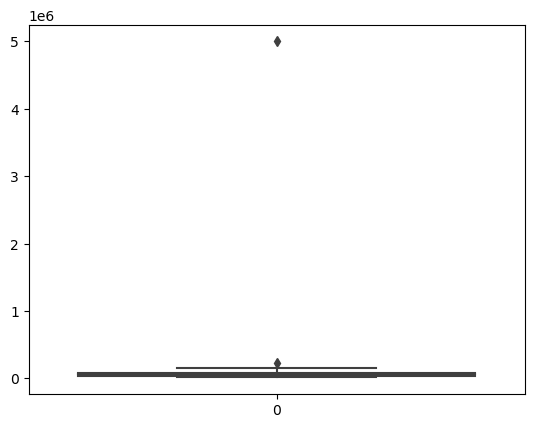

In [12]:
sns.boxplot(dataset["EstimatedSalary"])

In [13]:
q1 = dataset["EstimatedSalary"].quantile(q = 0.25)

In [14]:
q3 = dataset["EstimatedSalary"].quantile(q = 0.75)

In [15]:
q3

88000.0

In [16]:
iqr = q3 - q1

In [17]:
iqr

45000.0

In [18]:
lower_boundary = q1 - (1.5*iqr)

In [19]:
upper_boundary = q3*(1.5 * iqr)

In [20]:
dataset[dataset["EstimatedSalary"]<lower_boundary]

,Age,EstimatedSalary,Purchased


In [21]:
upper_boundary

5940000000.0

In [22]:
dataset[dataset["EstimatedSalary"] < upper_boundary]

,Age,EstimatedSalary,Purchased
0,19,19000.00,0
1,35,20000.00,0
2,26,43000.00,0
3,27,57000.00,0
4,19,76000.00,0
...,...,...,...
398,46,41000.00,1
399,51,23000.00,1
400,50,20000.00,1
401,36,33000.00,0


In [23]:
dataset["EstimatedSalary"].median()

70000.0

In [24]:
dataset[(dataset["EstimatedSalary"] < lower_boundary) | (dataset["EstimatedSalary"] > upper_boundary)]

,Age,EstimatedSalary,Purchased


In [25]:
outliers = dataset[(dataset["EstimatedSalary"] < lower_boundary) | (dataset["EstimatedSalary"] > upper_boundary)]

Drop Outliers

In [26]:
(len(outliers) / len(dataset)) * 100

0.0

In [27]:
outliers.index

Int64Index([], dtype='int64')

In [28]:
dataset.drop(outliers.index, axis = 0, inplace = True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_5984\4230092035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers.index, axis = 0, inplace = True)


In [29]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000.00,0
1,35,20000.00,0
2,26,43000.00,0
3,27,57000.00,0
4,19,76000.00,0
...,...,...,...
398,46,41000.00,1
399,51,23000.00,1
400,50,20000.00,1
401,36,33000.00,0


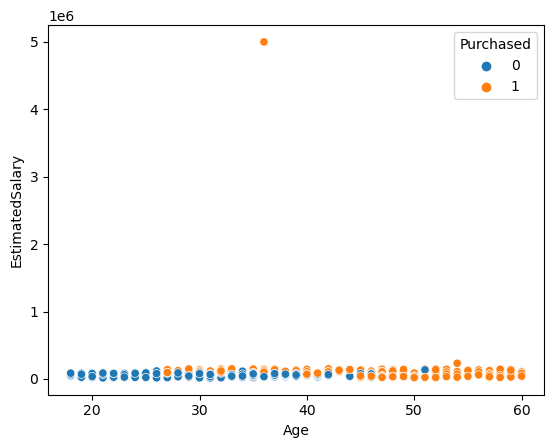

In [30]:
sns.scatterplot( x = dataset["Age"], y=dataset["EstimatedSalary"], hue = dataset["Purchased"])
plt.show()

In [31]:
X = dataset.drop("Purchased", axis = 1) #independent variables

In [32]:
X

,Age,EstimatedSalary
0,19,19000.00
1,35,20000.00
2,26,43000.00
3,27,57000.00
4,19,76000.00
...,...,...
398,46,41000.00
399,51,23000.00
400,50,20000.00
401,36,33000.00


In [33]:
y = dataset["Purchased"] #dependent variables 

In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
398    1
399    1
400    1
401    0
402    1
Name: Purchased, Length: 403, dtype: int64

Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 35)

In [37]:
X_train

,Age,EstimatedSalary
87,28,85000.00
145,24,89000.00
82,20,49000.00
278,38,71000.00
66,24,19000.00
...,...,...
232,35,147000.00
249,57,122000.00
33,28,44000.00
271,40,61000.00


In [38]:
 X_train.isnull().any()

Age                False
EstimatedSalary    False
dtype: bool

Create a  Pipeline

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [41]:
pf = PolynomialFeatures(degree = 4)
sc = MinMaxScaler()
lor_model = LogisticRegression()

In [42]:
steps = [("poly_features", pf), ("scaling", sc), ("lor_model", lor_model)]

In [43]:
steps

[('poly_features', PolynomialFeatures(degree=4)),
 ('scaling', MinMaxScaler()),
 ('lor_model', LogisticRegression())]

In [44]:
lor_pipeline = Pipeline(steps = steps)


In [45]:
lor_pipeline

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('scaling', MinMaxScaler()),
                ('lor_model', LogisticRegression())])

Train /Fit the pipeline

In [46]:
X_train

,Age,EstimatedSalary
87,28,85000.00
145,24,89000.00
82,20,49000.00
278,38,71000.00
66,24,19000.00
...,...,...
232,35,147000.00
249,57,122000.00
33,28,44000.00
271,40,61000.00


In [47]:
lor_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('scaling', MinMaxScaler()),
                ('lor_model', LogisticRegression())])

In [48]:
#lor_pipeline -- has complete objects

Prediction/ Testing

In [49]:
y_pred = lor_pipeline.predict(X_test)

In [50]:
 y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

Evaluation

In [51]:
y_pred
 

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [52]:
y_test = y_test.astype("float")

In [53]:
y_test

101   0.00
10    0.00
332   1.00
194   0.00
80    0.00
      ... 
367   1.00
396   1.00
265   0.00
224   1.00
233   0.00
Name: Purchased, Length: 81, dtype: float64

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
test_score = accuracy_score(y_test, y_pred)

In [56]:
test_score

0.8148148148148148

In [57]:
test_score * 100

81.48148148148148

In [58]:
#the above score indicates that approx 84% of the prediction are correct

In [59]:
y_pred_train = lor_pipeline.predict(X_train)

In [60]:
y_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [61]:
train_score = accuracy_score(y_train, y_pred_train)

In [62]:
train_score

0.8540372670807453

In [63]:
import mlxtend

In [64]:
mlxtend.__version__

'0.22.0'

In [65]:
#!pip install mlxtend == 0.22.0

In [66]:
from mlxtend.plotting import plot_decision_regions

In [67]:
y_train.astype("int").values #convert series into numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [68]:
X_train

,Age,EstimatedSalary
87,28,85000.00
145,24,89000.00
82,20,49000.00
278,38,71000.00
66,24,19000.00
...,...,...
232,35,147000.00
249,57,122000.00
33,28,44000.00
271,40,61000.00


C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


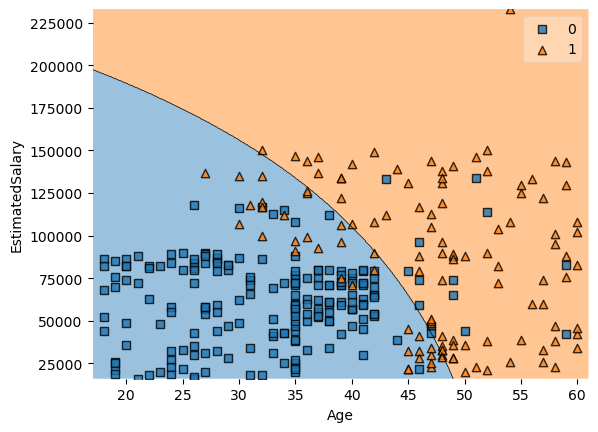

In [69]:
plot_decision_regions(X_train.values, y_train.astype("int").values, clf = lor_pipeline)

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


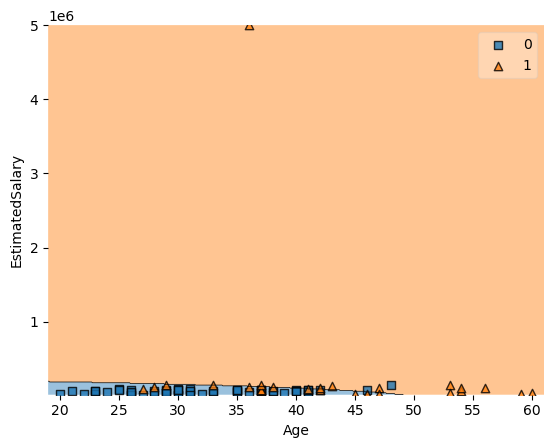

In [70]:
plot_decision_regions(X_test.values, y_test.astype("int").values, clf = lor_pipeline)

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
cm_test = confusion_matrix(y_test, y_pred)

In [73]:
cm_test


array([[53,  2],
       [13, 13]], dtype=int64)

In [74]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

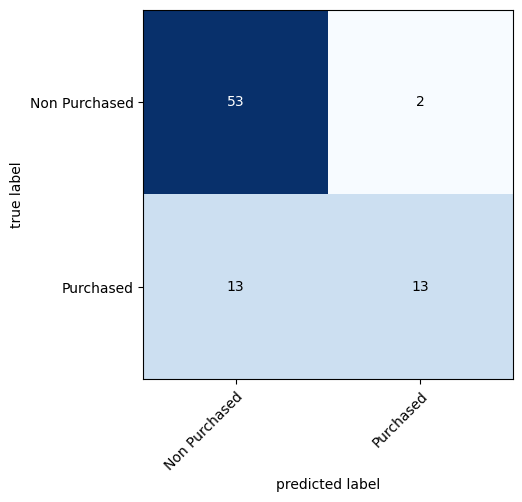

In [75]:
plot_confusion_matrix(cm_test, class_names = ["Non Purchased", "Purchased"])

In [76]:
cm_train = confusion_matrix(y_train, y_pred_train)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

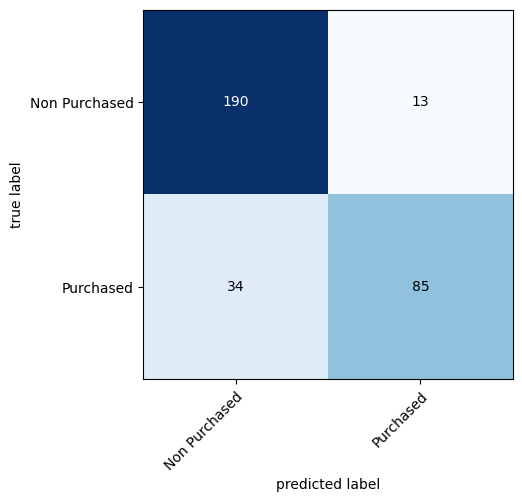

In [77]:
plot_confusion_matrix(cm_train, class_names = ["Non Purchased", "Purchased"])

Real Time Prediction

In [78]:
X.head(1)

,Age,EstimatedSalary
0,19,19000.00


In [79]:
data = [25, 60000]

In [80]:
data = np.array([data])

In [81]:
data

array([[   25, 60000]])

In [82]:
lor_pipeline.predict(data)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Save The model

In [83]:
import joblib

In [84]:
joblib.dump(lor_pipeline, "purchased_prediction_pipeline.pkl")

['purchased_prediction_pipeline.pkl']